# About the network

1. Paper on CornerNet: https://arxiv.org/abs/1808.01244

2. Paper on CornerNet-Lite: https://arxiv.org/abs/1904.08900

3. Blog 1 on CornerNet: https://joshua19881228.github.io/2019-01-20-CornerNet/

4. Blog 2 on CornerNet: https://zhangtemplar.github.io/anchor-free-detection/

5. Blog 3 on CornerNet: https://opencv.org/latest-trends-of-object-detection-from-cornernet-to-centernet-explained-part-i-cornernet/

6. Blog 4 on CornerNet: https://towardsdatascience.com/centernet-keypoint-triplets-for-object-detection-review-a314a8e4d4b0

7. Blog 5 on CornerNet: https://medium.com/@andersasac/the-end-of-anchors-improving-object-detection-models-and-annotations-73828c7b39f6

#Установка

In [ ]:
!git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
!cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install_colab.sh && ./install_colab.sh
#! cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install.sh && ./install.sh

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10565, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 10565 (delta 18), reused 24 (delta 10), pack-reused 10525 (from 1)
Receiving objects: 100% (10565/10565), 260.88 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (4710/4710), done.
Updating files: 100% (8428/8428), done.
xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-yugzec18/pycocotools_83170e88b5e847eabf17c35aaf73c853
  Running command git clone --filter=blob:none --quiet https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-yugzec18/pycocotools_83170e88b5e847eabf17c35aaf73c853
  Resolved https://github.com/abhi-kumar/cocoapi.git to commit 1d6d019f8938f47a9b5af28685011898b25ff93a
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocot

**Тут перезапустить среду**

In [ ]:
!pip install "git+https://github.com/abhi-kumar/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-dx2tch8r/pycocotools_3d87b762cc684438919e5e342272b372
  Running command git clone --filter=blob:none --quiet https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-dx2tch8r/pycocotools_3d87b762cc684438919e5e342272b372
  Resolved https://github.com/abhi-kumar/cocoapi.git to commit 1d6d019f8938f47a9b5af28685011898b25ff93a
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install gdown
!gdown 11VIda1EEUG9FkDUVVSRYqg0LADeKmCL8
!unzip -qq /content/fashion_trained.zip

Downloading...
From (original): https://drive.google.com/uc?id=11VIda1EEUG9FkDUVVSRYqg0LADeKmCL8
From (redirected): https://drive.google.com/uc?id=11VIda1EEUG9FkDUVVSRYqg0LADeKmCL8&confirm=t&uuid=f64ad710-fc87-4007-9c99-f13ad1648135
To: /content/fashion_trained.zip
100% 1.30G/1.30G [00:18<00:00, 69.3MB/s]


#Стандартный пример (не применим)

In [ ]:
%cd /content
import os
import sys
sys.path.append("Monk_Object_Detection/6_cornernet_lite/lib/")
from infer_detector import Infer
gtf = Infer();
class_list = ["long_sleeve_dress","long_sleeve_outwear","long_sleeve_top","short_sleeve_dress","short_sleeve_outwear","short_sleeve_top","shorts","skirt","sling","sling_dress","trousers","vest","vest_dress"]


/content


In [ ]:
gtf.Model(class_list,
          base="CornerNet_Saccade",
          model_path="./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl")

total parameters: 116866025
loading from ./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl


/content/Monk_Object_Detection/6_cornernet_lite/lib/core/nnet/py_factory.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(f)


/content/Monk_Object_Detection/6_cornernet_lite/lib/core/test/cornernet_saccade.py:310: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:78.)
  im_mean = torch.cuda.FloatTensor(db.mean).reshape(1, 3, 1, 1)


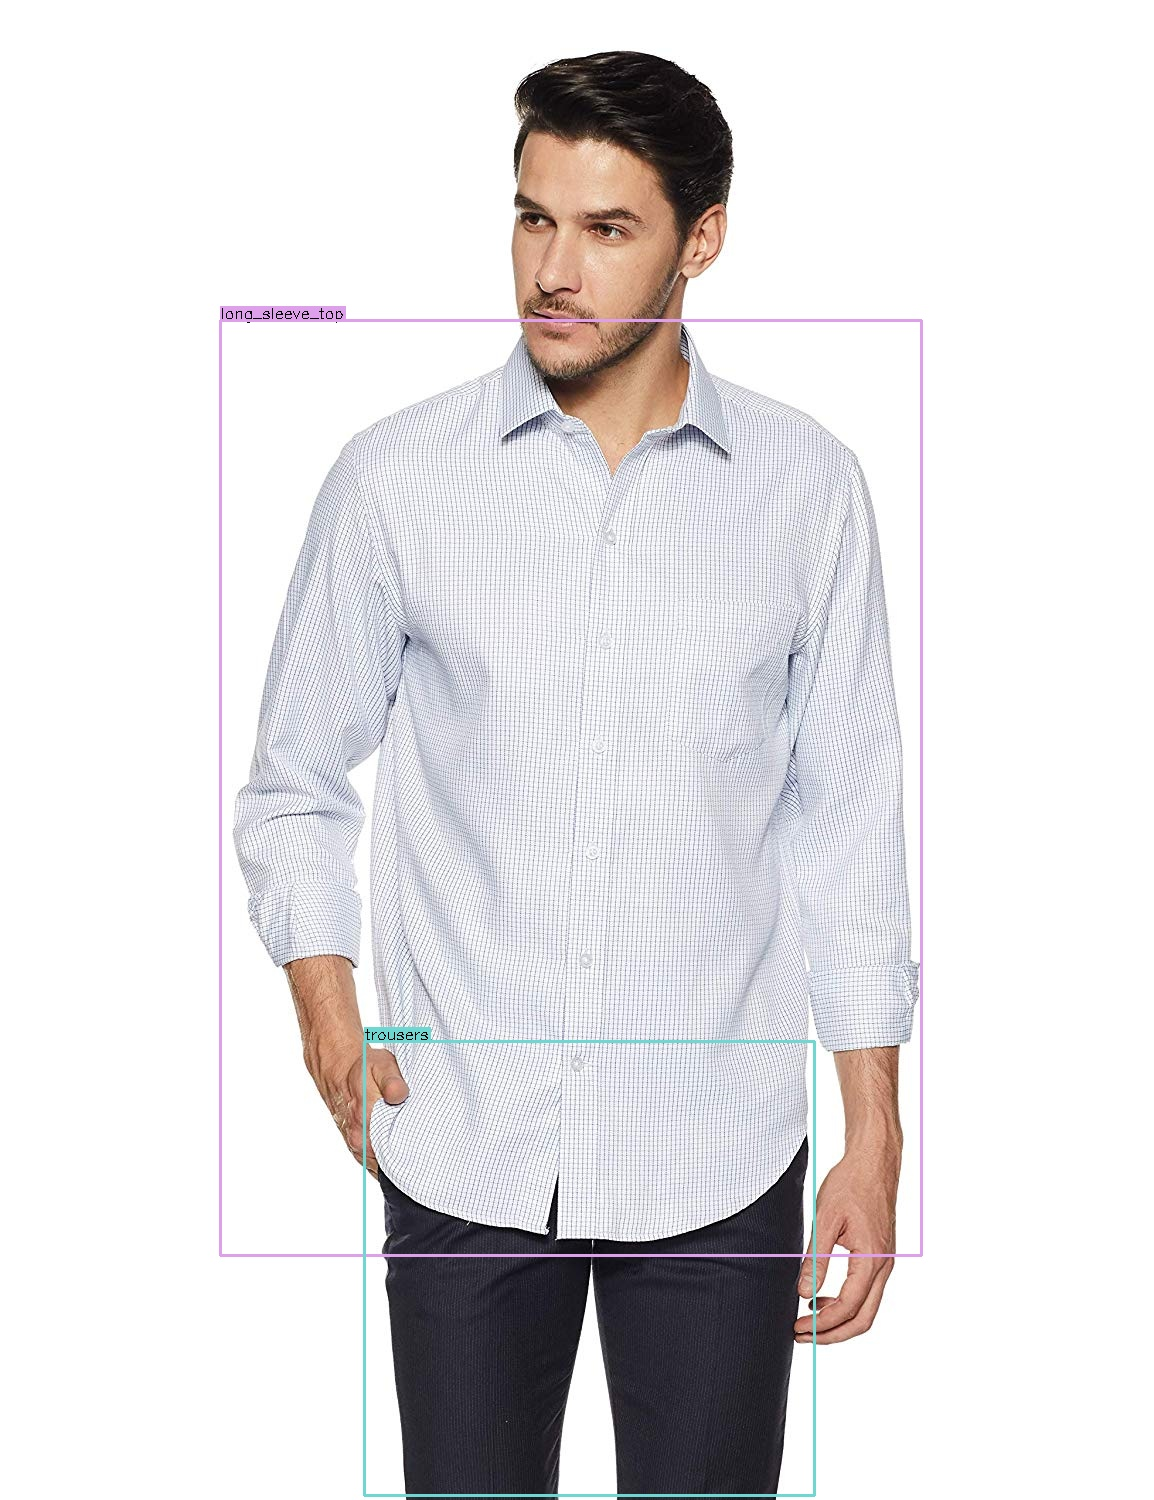

In [ ]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/test_fashion/test1.jpg",
                    vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

# Пример для реального использования

In [ ]:
sys.path.append("/content/Monk_Object_Detection/6_cornernet_lite/lib")
from core.detectors import CornerNet_Saccade
import cv2

In [ ]:
class_list = ["long_sleeve_dress","long_sleeve_outwear","long_sleeve_top","short_sleeve_dress","short_sleeve_outwear","short_sleeve_top","shorts","skirt","sling","sling_dress","trousers","vest","vest_dress"]
model_path = "/content/cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl"
source_img_path = "/content/Monk_Object_Detection/example_notebooks/sample_dataset/test_fashion/test1.jpg"

In [ ]:
detector = CornerNet_Saccade(test=True, class_list=class_list, model_path=model_path)
source_image = cv2.imread(source_img_path)
raw_result = detector(source_image)
thresh = 0.5
featured_categories = []

for cat in raw_result:
    keep_index = raw_result[cat][:, -1] > thresh
    if len(raw_result[cat][keep_index]) == 0:
        continue
    featured_categories.append(cat)


print("РЕЗУЛЬТАТ:", featured_categories)

total parameters: 116866025
loading from /content/cache/nnet/CornerNet_Saccade/CornerNet_Saccade_best.pkl
РЕЗУЛЬТАТ: ['long_sleeve_top', 'trousers']


/content/Monk_Object_Detection/6_cornernet_lite/lib/core/nnet/py_factory.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(f)


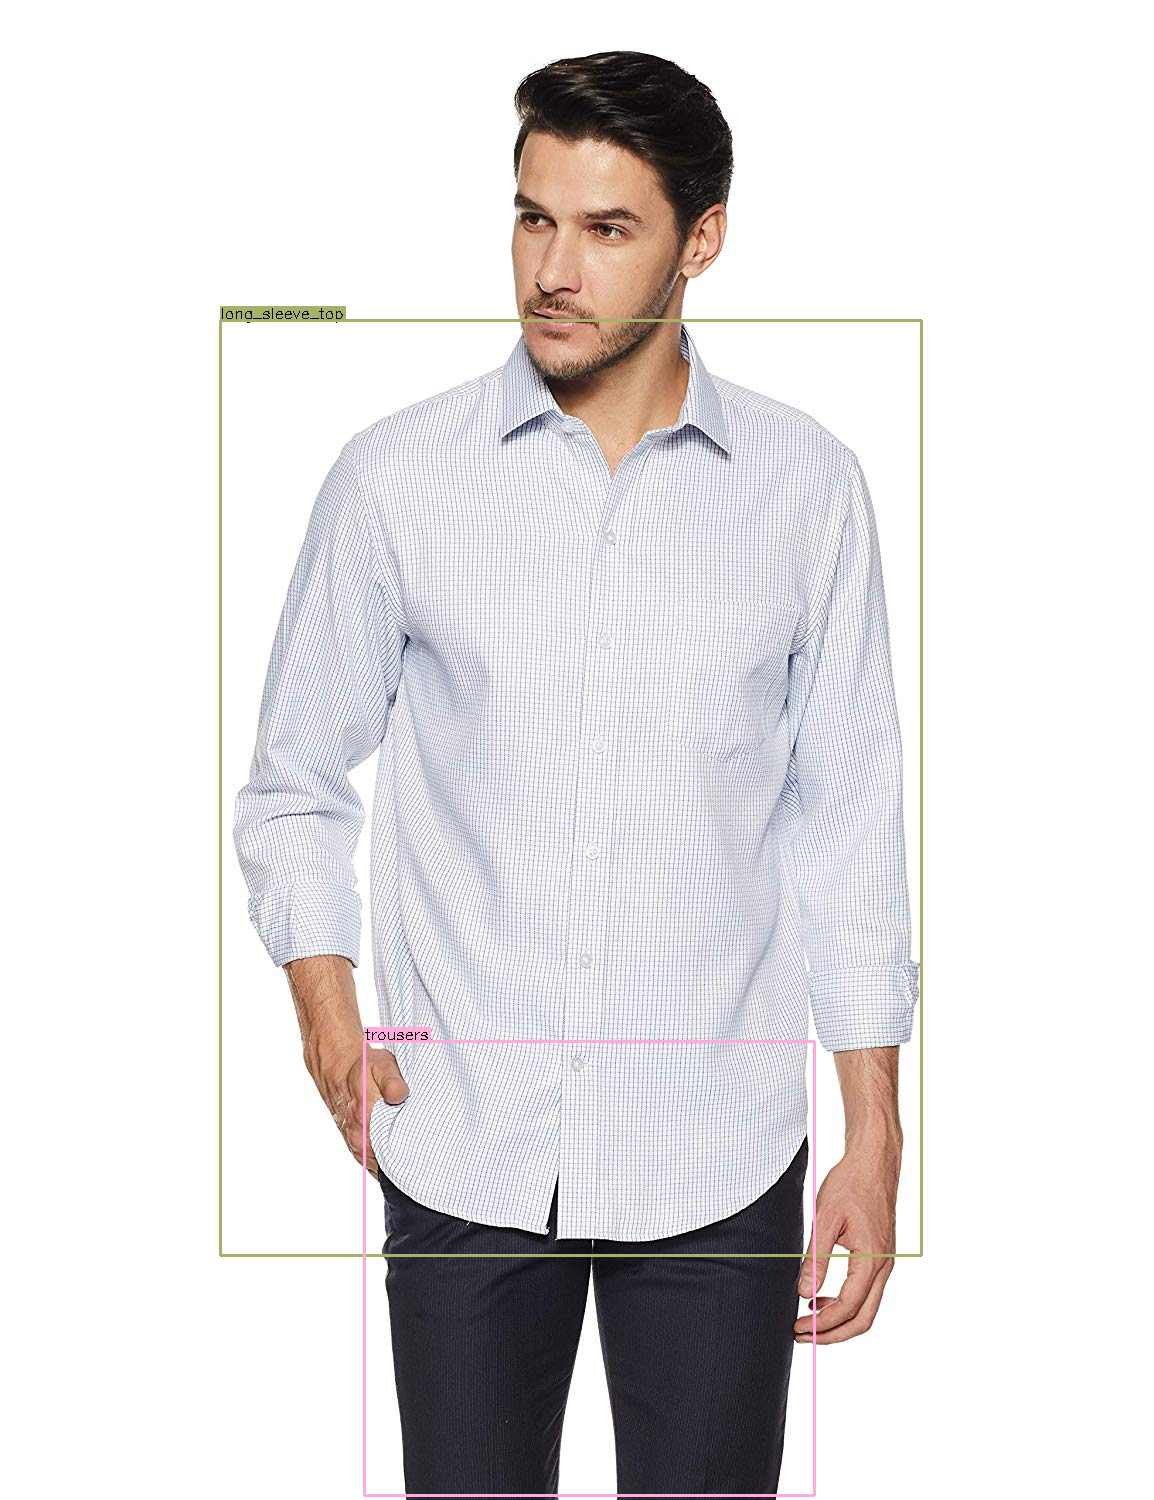

In [ ]:
from core.vis_utils import draw_bboxes
from google.colab.patches import cv2_imshow

image = draw_bboxes(source_image, raw_result, thresh=thresh)
cv2.imwrite("output.jpg", image)
cv2_imshow(image)